Consigna
En este proyecto profundizarás lo desarrollado en el proyecto 01 (“Primer modelo de Machine Learning”). El objetivo es aplicar las técnicas incorporadas (Transformación de Datos, Optimización de Hiperparámetros, Modelos Avanzados, etc.) para generar un modelo que tenga un mejor desempeño que el modelo generado en el proyecto anterior. Luego, interpreta ese modelo para responder la siguiente pregunta: ¿qué podemos aprender de nuestro problema estudiando el modelo que generamos?

El trabajo se organiza en tres partes:

PARTE A - Transformación de Datos

Elige cuáles de las siguientes tareas son apropiadas para su dataset. Justifica e implementa:

Detección y eliminación de Outliers

Encoding

Imputación de valores faltantes

Escalado de datos

Generación de nuevas variables predictoras/reducción de dimensionalidad (SVD/PCA).

Vuelve a entrenar el modelo implementado en la Entrega 01 - en particular, el árbol de decisión - y evalúa su desempeño a partir del dataset obtenido luego de transformar los datos. ¿Hay una mejora en su desempeño? Sea cual sea la respuesta, intenta explicar a qué se debe.

Checklist de evaluación
Sugerencias para desarrollar el proyecto:

Este proyecto no cuenta con mínimos entregables indicados en la consigna, pero ten en cuenta lo siguiente:
en la Parte A debes implementar al menos tres de las transformaciones de datos propuestas.

PARTE A - Transformación de Datos

Debes justificar por qué creés que las transformaciones elegidas aplican en este dataset.

Debes re entrenar un modelo del Proyecto 01 y comparar su desempeño con el modelo obtenido en el Proyecto 01.


#### INICIO

Inicio la segunda entrega con el dataset de Properati.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
data=pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')

In [3]:
data.shape

(146660, 19)

Con la finalidad de poder comparar el desempeño del modelo elegido en la primera entrega,con un modelo de Arbol de Decisión que desarrollaré en esta parte; aplico un filtro al dataset inicial seleccionando las instancias de propiedades en Capital Federal de tipo Casa , Departamento y Ph. 

In [4]:
df = data[(data.l2 == 'Capital Federal') & 
                          (data.property_type.isin(['Departamento', 'Casa', 'PH']))]
df.shape 

(91485, 19)

Reseteo el Index del dataset después de efectuado el filtro.

In [5]:
df = df.reset_index(drop=True)

Imprimo las primeras instancias del dataset.

In [6]:
df.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta


In [7]:
df.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,86951.000000,86937.000000,91485.000000,91485.000000,89314.000000,82568.000000,82250.000000,9.148500e+04
mean,-34.599081,-58.436002,2.964278,1.960278,1.560147,112.626369,94.966310,2.595003e+05
std,0.023957,0.036297,1.314704,1.072946,0.860309,980.713664,778.515243,3.222654e+05
min,-34.696419,-58.530468,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,-34.613757,-58.459605,2.000000,1.000000,1.000000,49.000000,44.000000,1.200000e+05
50%,-34.599446,-58.433789,3.000000,2.000000,1.000000,71.000000,63.000000,1.750000e+05
75%,-34.584148,-58.410143,4.000000,3.000000,2.000000,111.000000,96.000000,2.790000e+05
max,-34.535818,-58.353930,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


Con los primeros datos estadísticos compruebo la existencia de Outliers.

Para obtener una impresión visual, grafíco con boxplot las columnas 'rooms', 'bedrooms', 'bathrooms' y 'surface total'.

Text(0, 0.5, 'surface_total')

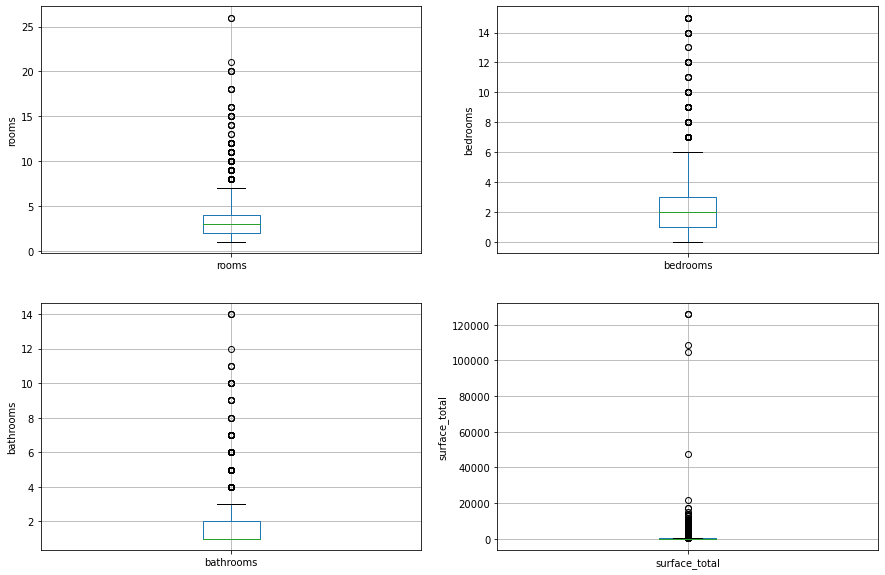

In [8]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='rooms')
fig.set_title('')
fig.set_ylabel('rooms')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='bedrooms')
fig.set_title('')
fig.set_ylabel('bedrooms')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='bathrooms')
fig.set_title('')
fig.set_ylabel('bathrooms')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='surface_total')
fig.set_title('')
fig.set_ylabel('surface_total')


**Elijo remover datos atípicos con IQR.**

In [9]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [10]:
dfout=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
dfout.shape

(79211, 19)

Aplicado IQR, nuevamente grafíco mediante boxplot para obtener una impresión visual del resultado de eliminación de datos atípicos.

Text(0, 0.5, 'surface_total')

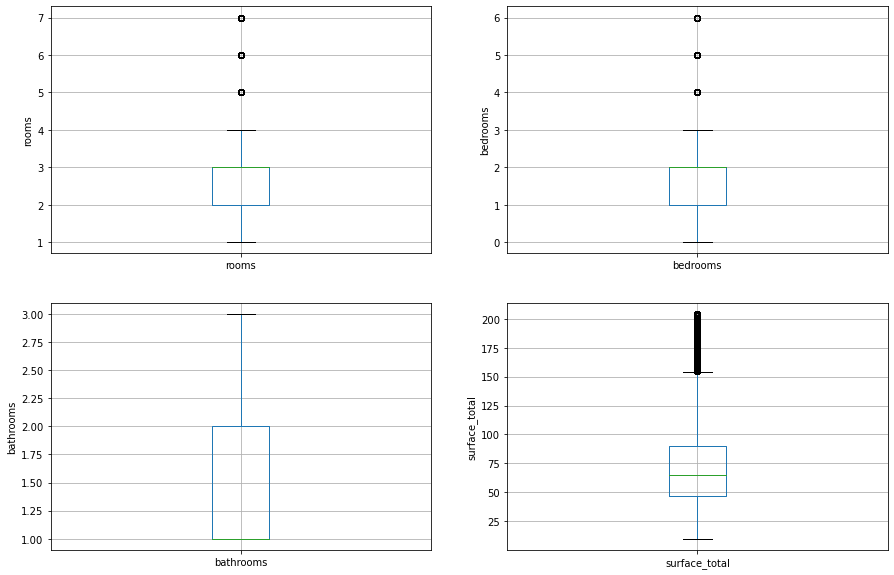

In [11]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = dfout.boxplot(column='rooms')
fig.set_title('')
fig.set_ylabel('rooms')


plt.subplot(2, 2, 2)
fig = dfout.boxplot(column='bedrooms')
fig.set_title('')
fig.set_ylabel('bedrooms')


plt.subplot(2, 2, 3)
fig = dfout.boxplot(column='bathrooms')
fig.set_title('')
fig.set_ylabel('bathrooms')


plt.subplot(2, 2, 4)
fig = dfout.boxplot(column='surface_total')
fig.set_title('')
fig.set_ylabel('surface_total')


Cómo eliminé instancias reseteo el index de mi dataset

In [12]:
dfout = dfout.reset_index(drop=True)

Efectuados los procedimientos iniciales, obtengo un dataset con valores estadísticos más equilibrados.

In [13]:
dfout.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,75748.000000,75737.000000,79211.000000,79211.000000,77205.000000,70988.000000,70721.000000,79211.000000
mean,-34.599061,-58.437045,2.700875,1.755741,1.360223,73.156421,64.508774,185623.100857
std,0.022616,0.035465,1.032024,0.882721,0.578070,35.061140,29.230115,93228.938560
min,-34.657969,-58.530467,1.000000,0.000000,1.000000,10.000000,1.000000,7500.000000
25%,-34.613641,-58.459786,2.000000,1.000000,1.000000,47.000000,42.000000,115000.000000
50%,-34.600020,-58.434263,3.000000,2.000000,1.000000,65.000000,57.000000,160000.000000
75%,-34.585684,-58.412343,3.000000,2.000000,2.000000,90.000000,80.000000,235000.000000
max,-34.539737,-58.353930,7.000000,6.000000,3.000000,204.000000,174.000000,517266.000000


In [14]:
df2=dfout

Observo la distribución de variables, antes de iniciar el proceso de tratamiento de valores nulos y valores invertidos.

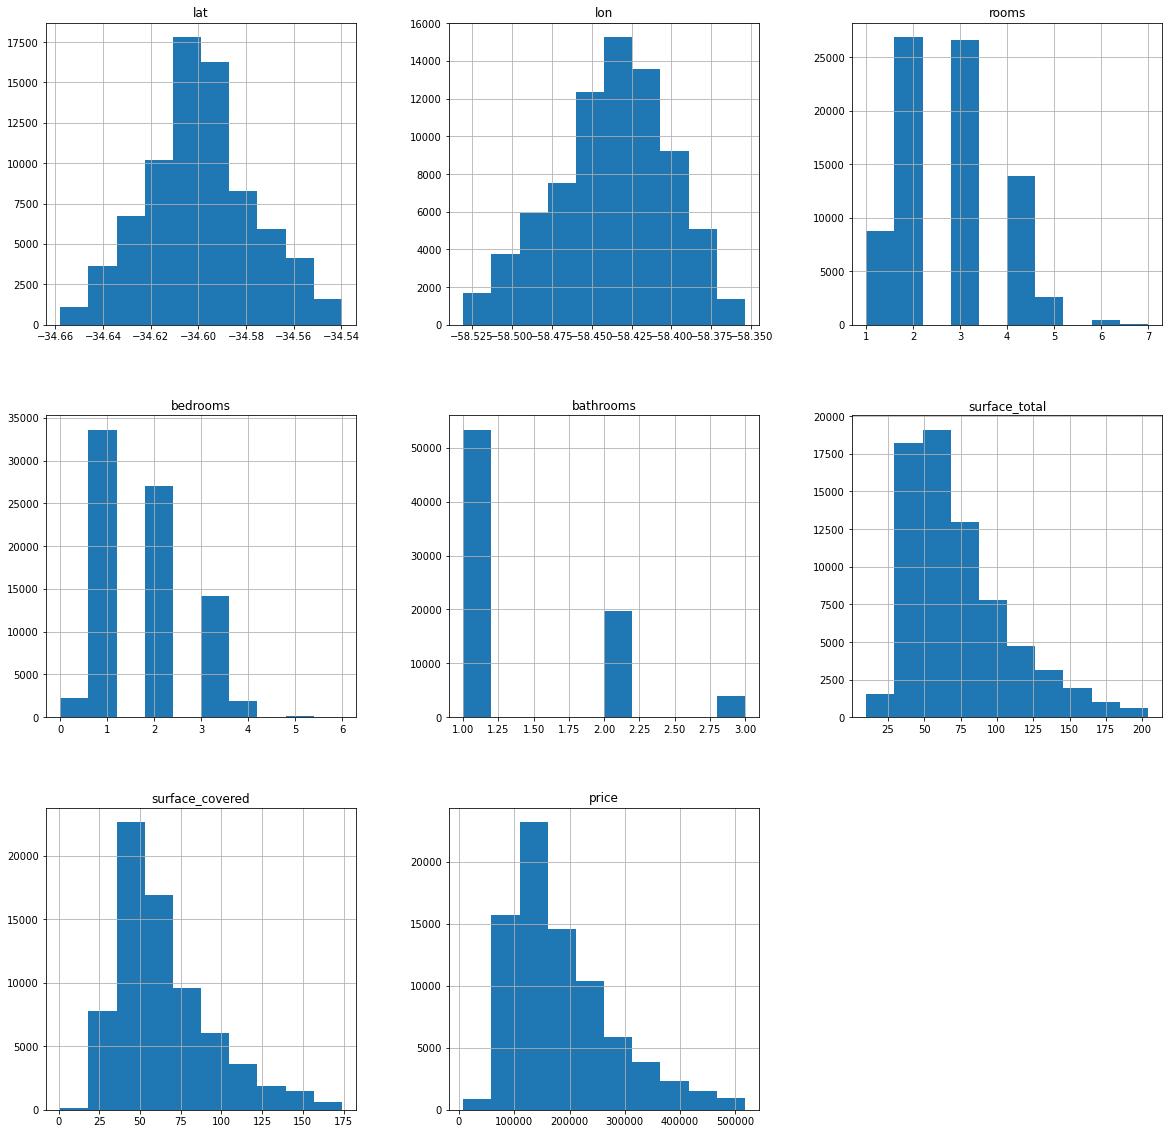

In [15]:
pict=df2.hist(figsize = (20,20))

Verifico la existencia de valores faltantes

In [16]:
print(df2.isnull().sum())

start_date            0
end_date              0
created_on            0
lat                3463
lon                3474
l1                    0
l2                    0
l3                    0
rooms                 0
bedrooms              0
bathrooms          2006
surface_total      8223
surface_covered    8490
price                 0
currency              0
title                 0
description           0
property_type         0
operation_type        0
dtype: int64


Para no descartar instancias y/o afectar la distribución de las variables, elijo la estrategia de rellenar valores faltantes con 'median'.

In [17]:
df2['surface_total'].fillna(df2['surface_total'].median(), inplace = True)
df2['surface_covered'].fillna(df2['surface_covered'].median(), inplace=True)
df2['bathrooms'].fillna(df2['bathrooms'].median(), inplace = True)

Habiendo comprobado que en el dataset hay instancias de surface covered mayor a surface total, realizo un filtro para conocer cuantas son.

In [18]:
surface_valor_invertido = df2[df2["surface_total"] < df2["surface_covered"]]
print("Total de instancias con errores en la superficie:", surface_valor_invertido.shape[0])

Total de instancias con errores en la superficie: 799


Asumo, que los valores de estas instancias se encuentran invertidos.Por lo tanto, ni las elimino, ni reemplazo valores con otro valor estadístico. 

Siguiendo mi supuesto, procedo a intercambiar en estas instancias los valores de superficie total con los valores de superficie cubierta.

In [19]:
df2.at[surface_valor_invertido.index, 'surface_total'] = surface_valor_invertido.surface_covered
df2.at[surface_valor_invertido.index, 'surface_covered'] = surface_valor_invertido.surface_total

Verifico el procedimiento anterior.

In [20]:
surface_valor_invertido = df2[df2["surface_total"] < df2["surface_covered"]]
print("Total de instancias con errores en la superficie:", surface_valor_invertido.shape[0])

Total de instancias con errores en la superficie: 0


Visualización de distribución de variables posteriór al reemplazo de valores nulos con median y el intercambio de valores en instancias donde surface_covered era mayor a surface_total.

La distribución de variables del dataset no se vió afectada significativamente.

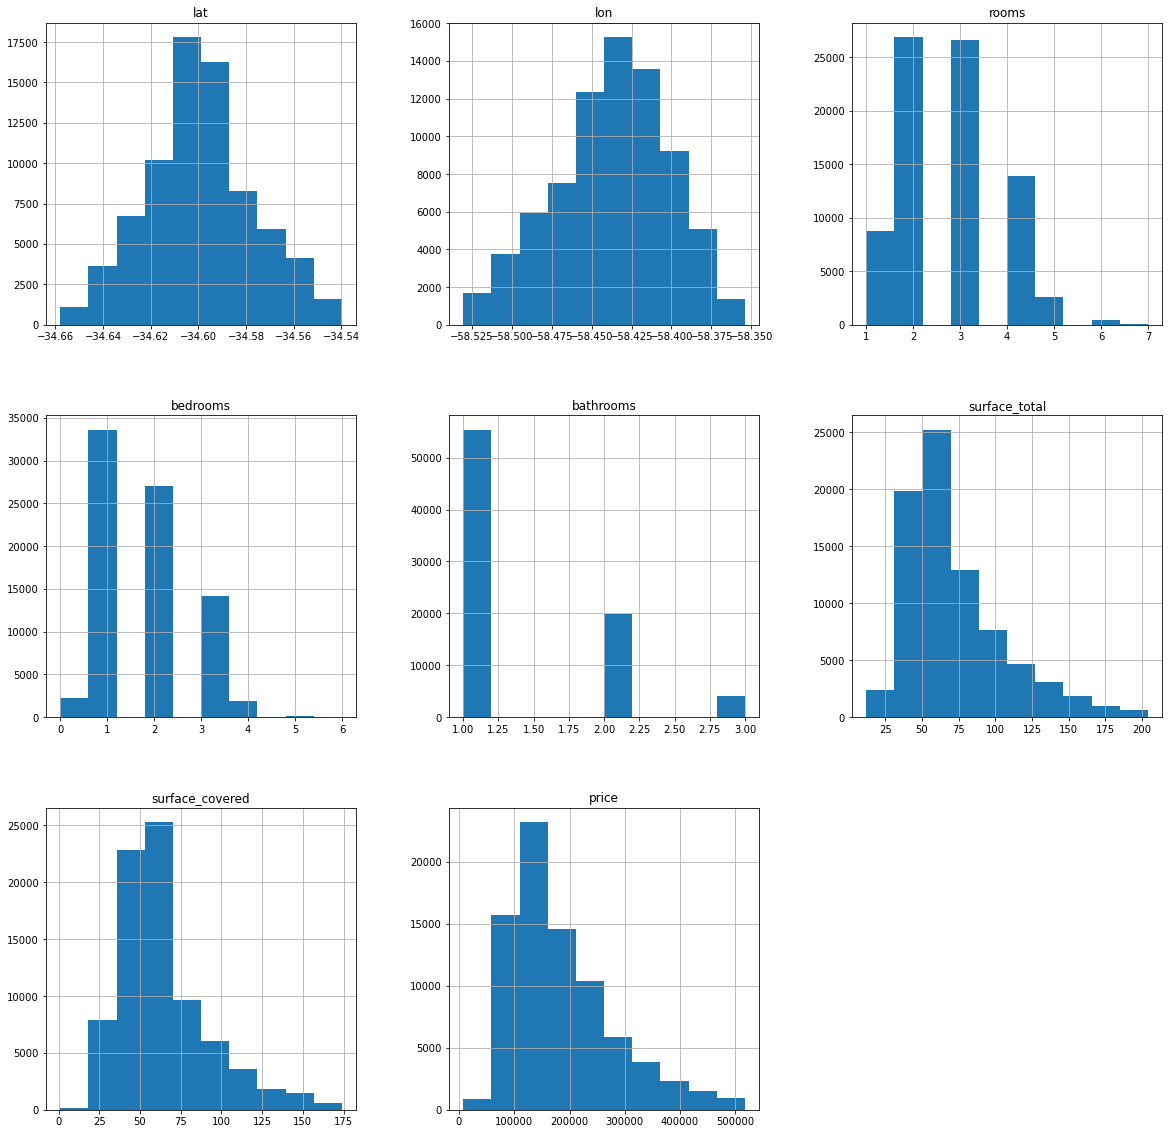

In [21]:
pict=df2.hist(figsize = (20,20))

Imprimo los primeros valores estadísticos del dataset

In [22]:
df2.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,75748.000000,75737.000000,79211.000000,79211.000000,79211.000000,79211.000000,79211.000000,79211.000000
mean,-34.599061,-58.437045,2.700875,1.755741,1.351100,72.419576,63.594084,185623.100857
std,0.022616,0.035465,1.032024,0.882721,0.573502,33.282637,27.684400,93228.938560
min,-34.657969,-58.530467,1.000000,0.000000,1.000000,12.000000,1.000000,7500.000000
25%,-34.613641,-58.459786,2.000000,1.000000,1.000000,49.000000,44.000000,115000.000000
50%,-34.600020,-58.434263,3.000000,2.000000,1.000000,65.000000,57.000000,160000.000000
75%,-34.585684,-58.412343,3.000000,2.000000,2.000000,86.000000,76.000000,235000.000000
max,-34.539737,-58.353930,7.000000,6.000000,3.000000,204.000000,174.000000,517266.000000


Efectúo una Visualización con Heatmap sobre la correlación de variables.

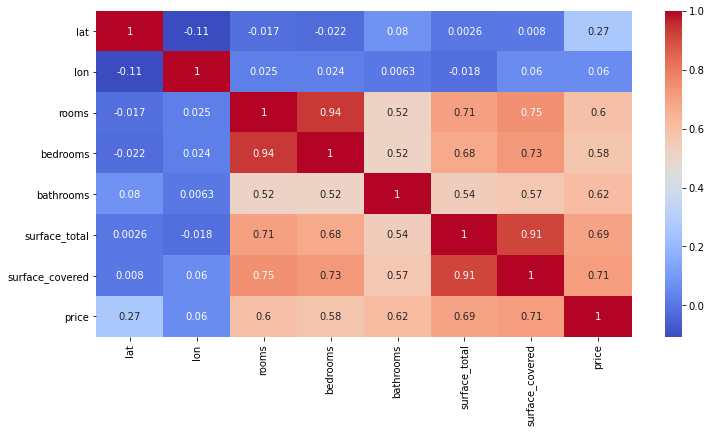

In [23]:
plt.figure(figsize=(12,6))
sns.heatmap(df2.corr(),cmap='coolwarm',annot=True)

Efectúo una Visualización con Pairplot.

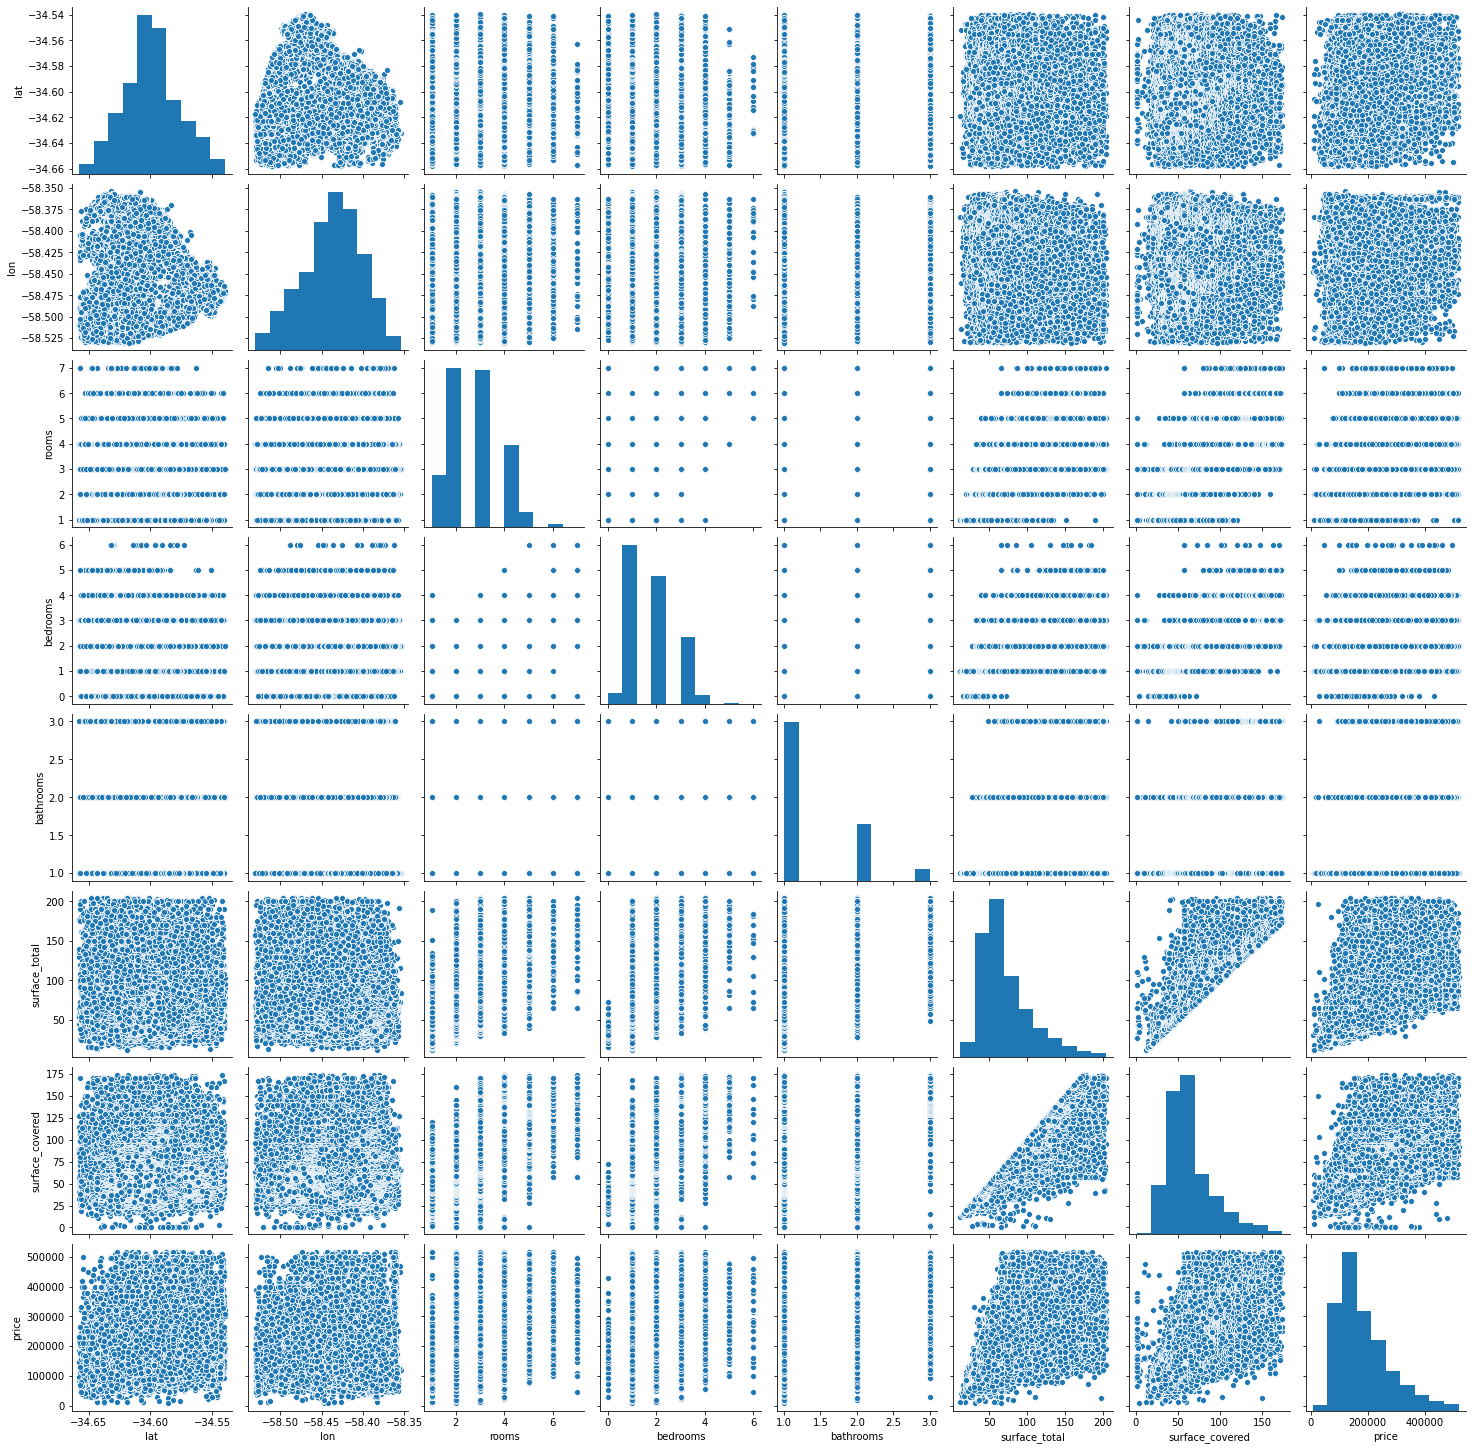

In [24]:
sns.pairplot(df2)
plt.savefig('salida.png')

Elimino columnas que considero innecesarias para mi análisis. 

Éstas son: 
'start_date',
'end_date';'created_on';
'l1';
'lat';
'lon';
'currency';
'title';
'description' y 
'operation_type'.

In [25]:
columnas_descartables = ['start_date','end_date','created_on','l1','lat','lon','currency',
                         'title','description','operation_type']
df2 = df2.drop(columns=columnas_descartables) 
df2.shape 

(79211, 9)

Encoding

Transformo variables categóricas de 'Barrios' y 'Tipo de Propiedad' a númericas, con el fin de incluirlas en mi análisis. 

In [26]:
from sklearn.preprocessing import OneHotEncoder

In [27]:
l3_get=pd.get_dummies(df2['l3'])

In [28]:
property_get=pd.get_dummies(df2['property_type'])

Defino un nuevo dataset, con las variables encodeadas.

In [29]:
df4=pd.concat([df2, l3_get,property_get ], axis=1)

Elimino las columnas categóricas encodeadas.

In [30]:
columnas_descartables = ['l2','l3','property_type']

In [31]:
df4 = df4.drop(columns=columnas_descartables)

Reseteo el index del dataset.

In [32]:
df4 = df4.reset_index(drop=True)

Imprimo las primeras instancias del nuevo dataset.

In [33]:
df4.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,Abasto,Agronomía,Almagro,Balvanera,...,Villa Ortuzar,Villa Pueyrredón,Villa Real,Villa Santa Rita,Villa Soldati,Villa Urquiza,Villa del Parque,Casa,Departamento,PH
count,79211.000000,79211.000000,79211.000000,79211.000000,79211.000000,79211.000000,79211.000000,79211.000000,79211.000000,79211.000000,...,79211.000000,79211.000000,79211.000000,79211.000000,79211.000000,79211.000000,79211.000000,79211.000000,79211.000000,79211.000000
mean,2.700875,1.755741,1.351100,72.419576,63.594084,185623.100857,0.005706,0.001894,0.090366,0.035248,...,0.003800,0.008269,0.001629,0.004116,0.000101,0.039906,0.015793,0.013180,0.885950,0.100870
std,1.032024,0.882721,0.573502,33.282637,27.684400,93228.938560,0.075325,0.043475,0.286708,0.184406,...,0.061527,0.090558,0.040323,0.064021,0.010049,0.195740,0.124676,0.114046,0.317874,0.301158
min,1.000000,0.000000,1.000000,12.000000,1.000000,7500.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,49.000000,44.000000,115000.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,3.000000,2.000000,1.000000,65.000000,57.000000,160000.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,3.000000,2.000000,2.000000,86.000000,76.000000,235000.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,7.000000,6.000000,3.000000,204.000000,174.000000,517266.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Creo un nuevo modelo de Árbol de Decisión, con la finalidad de comparar el desempeño del mismo respecto al elegido en el Proyecto N° 1. 

In [34]:
X = df4.drop(['price'],axis=1)
y = df4.price

Separo los datos de train y los de test.

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Realizado train_test_split, procedo a escalar los datos.

In [36]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train_sc=  pd.DataFrame(sc_X.fit_transform(X_train))

In [37]:
X_test_sc = pd.DataFrame(sc_X.transform(X_test))

#### Modelo Decision Tree Regressor

In [38]:
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor(max_depth=20, random_state=42)
tree_model.fit(X_train_sc, y_train)
y_train_pred_tree = tree_model.predict(X_train_sc)
y_test_pred_tree = tree_model.predict(X_test_sc)

Implemento las mísmas métricas usadas en el proyecto N°1, R2, MSE y RMSE.

In [39]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Imprimo métricas en Train.

In [40]:
print('MSE train: ',mean_squared_error(y_train, tree_model.predict(X_train_sc)))
print('RMSE train:',np.sqrt(mean_squared_error(y_train, tree_model.predict(X_train_sc))))
print ('R2 de DecisionTreeRegressor en train:', tree_model.score(X_train_sc,y_train) )

MSE train:  851868429.5275707
RMSE train: 29186.785186580084
R2 de DecisionTreeRegressor en train: 0.9019639635970743


Imprimo métricas en Test.

In [41]:
print('MSE test: ',mean_squared_error(y_test, tree_model.predict(X_test_sc)))
print('RMSE test:',np.sqrt(mean_squared_error(y_test, tree_model.predict(X_test_sc))))
print ('R2 de DecisionTreeRegressor en test:', tree_model.score(X_test_sc,y_test) )

MSE test:  1680361445.19314
RMSE test: 40992.212006589005
R2 de DecisionTreeRegressor en test: 0.8067774580249041


#### Grafíco el desempeño del modelo, considerando "R2" y "Raíz del error cuadrático medio -RMSE", tanto para Train cómo para Test.

In [42]:
def evaluar_modelo (y_train,y_train_pred, y_test, y_test_pred):

    plt.figure(figsize = (10,5))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)

    lims = [np.min([ax.get_xlim(), ax.get_ylim()]), 
        np.max([ax.get_xlim(), ax.get_ylim()]), 
        ]

    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')

    plt.tight_layout()
    plt.show()

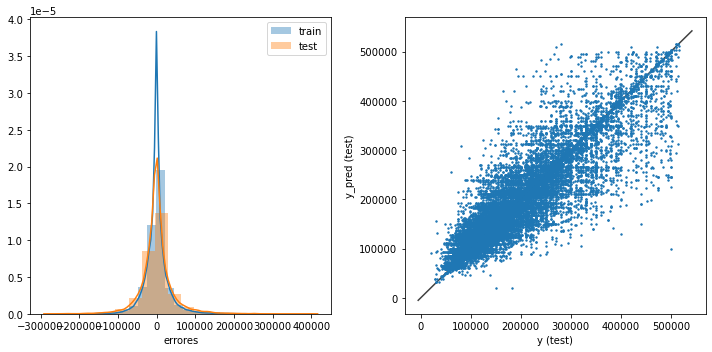

In [43]:
evaluar_modelo(y_train,y_train_pred_tree, y_test, y_test_pred_tree)

#### Grafíco el desempeño de RMSE Training versus RMSE Test. 

In [44]:
RMSE_train = []
RMSE_test = []

for max_depth in range(1, 20, 5):
    tree_model = DecisionTreeRegressor(max_depth=max_depth)
    model = tree_model.fit(X_train_sc, y_train)
    y_pred = tree_model.predict(X_test_sc)
    RMSE_train.append(np.sqrt(mean_squared_error(y_train, tree_model.predict(X_train_sc))))
    RMSE_test.append(np.sqrt(mean_squared_error(y_test, y_pred))) 

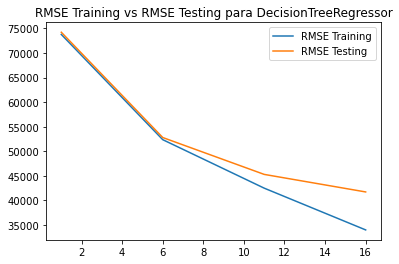

In [45]:
plt.plot(range(1,20, 5), RMSE_train, label='RMSE Training')
plt.plot(range(1,20, 5), RMSE_test, label='RMSE Testing')
plt.legend(loc='best')
plt.title('RMSE Training vs RMSE Testing para DecisionTreeRegressor')
plt.show()

#### El nuevo modelo de árbol de decisión (DECISION TREE OPTIMIZADO) obtuvo una mejor performance de R2 en Test que la que obtubo el modelo del proyecto 1.  Asimismo, mejoraron sustancialmente los  resultados en MSE y RMSE, tanto en Train cómo en Test. El incremento de error en R2 en Train, es aceptable ya que el mismo es a expensas de un modelo con mejor desempeño global.

Detalle de Resultados:
	
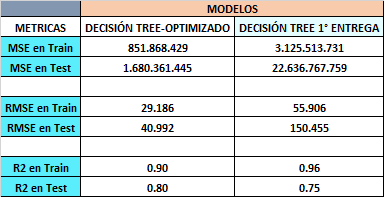

PARTE B - Modelos Avanzados

Elige dos de los modelos avanzados vistos (en el caso de regresión, considera una regresión lineal con atributos polinómicos y regularización). Entrénalos y evalúalos con sus argumentos por defecto. No te olvides de hacer un train/test split y usar Validación Cruzada.

Optimiza sus hiperparámetros mediante Validación Cruzada y Grid Search o Random Search.

Compara el desempeño de los nuevos modelos entre sí y con el modelo de la Parte A. ¿Cuál elegirías? Justifica.

Checklist de evaluación
Sugerencias para desarrollar el proyecto:


PARTE B - Modelos Avanzados

En la optimización de hiperparámetros, debes justificar los parámetros que elegiste para optimizar y el rango de cada uno.


#### Modelo Bagging Regressor

In [46]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
import scipy as sp

In [47]:
clf = BaggingRegressor(base_estimator=DecisionTreeRegressor(), bootstrap_features=False, 
                       n_estimators= 50, n_jobs = -1)
clf.fit(X_train_sc, y_train)
y_train_pred_bag = clf.predict(X_train_sc)
y_test_pred_bag = clf.predict(X_test_sc)

In [48]:
print('MSE train: ',mean_squared_error(y_train, clf.predict(X_train_sc)))
print('RMSE train:',np.sqrt(mean_squared_error(y_train, clf.predict(X_train_sc))))
print ('R2 de BaggingRegressor en train:', clf.score(X_train_sc,y_train) )

MSE train:  465991074.05060524
RMSE train: 21586.82640062233
R2 de BaggingRegressor en train: 0.9463720965403085


In [49]:
print('MSE test: ',mean_squared_error(y_test, clf.predict(X_test_sc)))
print('RMSE test:',np.sqrt(mean_squared_error(y_test, clf.predict(X_test_sc))))
print ('R2 de BaggingRegressor en test:', clf.score(X_test_sc,y_test) )

MSE test:  1192819187.1624718
RMSE test: 34537.214525240335
R2 de BaggingRegressor en test: 0.8628392979858514


#### Grafíco el desempeño del modelo, considerando "R2" y "Raíz del error cuadrático medio -RMSE", tanto para Train cómo para Test.

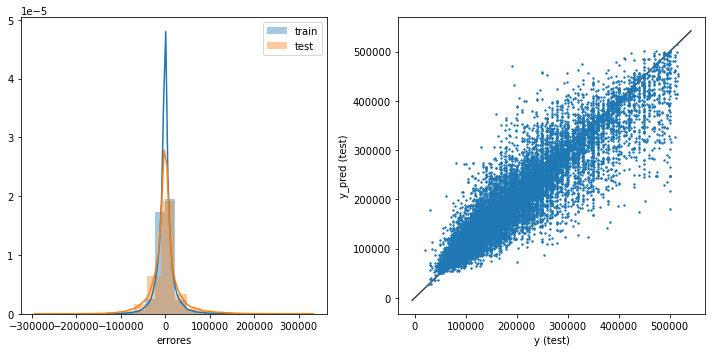

In [50]:
evaluar_modelo(y_train,y_train_pred_bag, y_test, y_test_pred_bag)

#### Grafíco el desempeño de RMSE Training versus RMSE Test. 

In [51]:
RMSE_train = []
RMSE_test = []

for n_estimators in range(1, 30, 1):
    clf = BaggingRegressor(n_estimators = n_estimators)
    model = clf.fit(X_train_sc,y_train)
    y_pred = clf.predict(X_test_sc)
    RMSE_train.append(np.sqrt(mean_squared_error(y_train, clf.predict(X_train_sc))))
    RMSE_test.append(np.sqrt(mean_squared_error(y_test, y_pred)))     

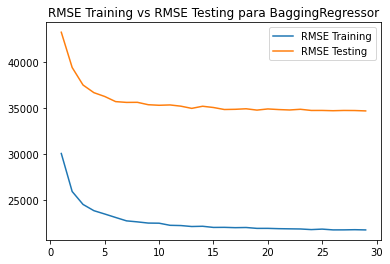

In [52]:
plt.plot(range(1,30, 1), RMSE_train, label='RMSE Training')
plt.plot(range(1,30, 1), RMSE_test, label='RMSE Testing')
plt.legend(loc='best')
plt.title('RMSE Training vs RMSE Testing para BaggingRegressor')
plt.show()

#### Optimizacion de hiperparametros.

#### Validación Cruzada. 

In [53]:
clf_cv = cross_val_score(clf, X_train_sc, y_train.values.ravel(), cv=5)

print("R2 en cada iteracion:", clf_cv)
print("R2: %0.2f (+/- %0.2f)" % (clf_cv.mean(), clf_cv.std() * 2))

R2 en cada iteracion: [0.85847635 0.8484718  0.84974603 0.85210087 0.85039412]
R2: 0.85 (+/- 0.01)


#### Randomized Search CV 

In [54]:
modelo = BaggingRegressor(base_estimator=DecisionTreeRegressor())

grid = {'n_estimators':[5,10,20,50,70,100,120,150,170,200]}

bg_gs = RandomizedSearchCV(modelo, param_distributions=grid, cv=5, n_jobs=-1)

bg_gs.fit(X_train_sc,y_train.values.ravel())

print('Mejor hiperparámetro: ',bg_gs.best_params_)
print('Mejor resultado',bg_gs.best_score_)
print('Mejor modelo: ',bg_gs.best_estimator_)

Mejor hiperparámetro:  {'n_estimators': 150}
Mejor resultado 0.8546293656280781
Mejor modelo:  BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=150)


#### Regresión con Atributos Polinómicos y Regularización. Ridge.

In [55]:
from sklearn.preprocessing import PolynomialFeatures

In [56]:
poly = PolynomialFeatures(degree = 2, include_bias=False)
X_train_pol = poly.fit_transform(X_train_sc)
X_test_pol = poly.transform(X_test_sc)
print(X_train_pol.shape, X_test_pol.shape)

(55447, 2144) (23764, 2144)


In [57]:
from sklearn.linear_model import Ridge, Lasso

In [58]:
ridge = Ridge()
ridge.fit(X_train_pol,y_train)

Ridge()

In [59]:
y_train_pred_rid = ridge.predict(X_train_pol)
y_test_pred_rid = ridge.predict(X_test_pol)

In [60]:
print('MSE train: ',mean_squared_error(y_train, ridge.predict(X_train_pol)))
print('RMSE train:',np.sqrt(mean_squared_error(y_train, ridge.predict(X_train_pol))))
print ('R2 de Ridge en train:', ridge.score(X_train_pol,y_train) )

MSE train:  1926461186.4957688
RMSE train: 43891.470543782976
R2 de Ridge en train: 0.7782960226465229


In [61]:
print('MSE Test: ',mean_squared_error(y_test, ridge.predict(X_test_pol)))
print('RMSE Test:',np.sqrt(mean_squared_error(y_test, ridge.predict(X_test_pol))))
print ('R2 de Ridge en test:', ridge.score(X_test_pol,y_test) )

MSE Test:  1978717103.6796556
RMSE Test: 44482.77311139286
R2 de Ridge en test: 0.7724699351343203


#### Grafíco el desempeño del modelo, considerando "R2" y "Raíz del error cuadrático medio -RMSE", tanto para Train cómo para Test.

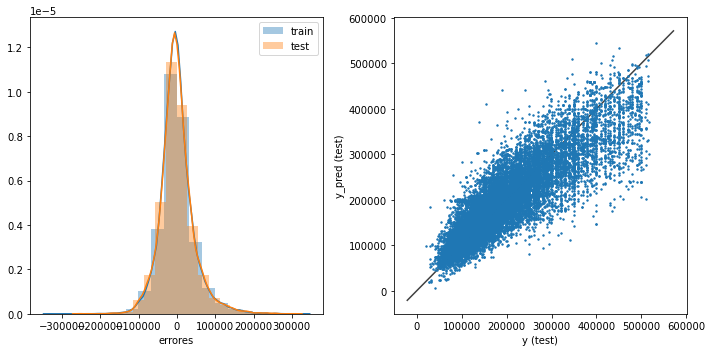

In [62]:
evaluar_modelo(y_train,y_train_pred_rid, y_test, y_test_pred_rid)

PROBANDO

#### Grafíco el desempeño de RMSE Training versus RMSE Test. 

In [63]:
RMSE_train = []
RMSE_test = []
for n_alpha in [200,100,50,10, 5, 1, 0.01, 0.001]:
    ridge = Ridge(alpha = n_alpha)
    ridge.fit(X_train_pol,y_train)
    y_pred = ridge.predict(X_test_pol)
    RMSE_train.append(np.sqrt(mean_squared_error(y_train, ridge.predict(X_train_pol))))
    RMSE_test.append(np.sqrt(mean_squared_error(y_test, y_pred)))

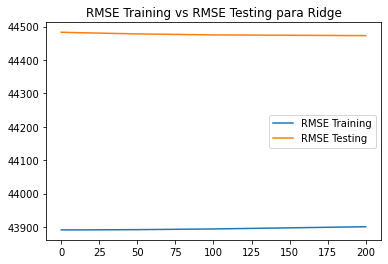

In [64]:
#plt.plot([10, 5, 1, 0.5, 0.1 ,0.01, 0.005, 0.001], RMSE_train, label='RMSE Training')
#plt.plot([10, 5, 1, 0.5, 0.1 ,0.01, 0.005, 0.001], RMSE_test, label='RMSE Testing')
plt.plot([200,100,50,10, 5, 1, 0.01, 0.001], RMSE_train, label='RMSE Training')
plt.plot([200,100,50,10, 5, 1, 0.01, 0.001], RMSE_test, label='RMSE Testing')
plt.legend(loc='best')
plt.title('RMSE Training vs RMSE Testing para Ridge')
plt.show()

#### Optimización de hiperparámetros.

#### Validación Cruzada 

In [65]:
ridge_cv = cross_val_score(ridge, X_train_pol, y_train.values.ravel(), cv=5)

print("R2 en cada iteracion:", ridge_cv)
print("R2: %0.2f (+/- %0.2f)" % (ridge_cv.mean(), ridge_cv.std() * 2))

R2 en cada iteracion: [0.77917008 0.76728734 0.77111304 0.7708956  0.77182889]
R2: 0.77 (+/- 0.01)


#### RandomizedSearchCV. 

In [66]:
modelo = Ridge()

grid = {'alpha':[10, 1, 0.1, 0.01, 0.001]}

ridge_rs = RandomizedSearchCV(modelo, param_distributions=grid, cv=5, n_jobs=-1,n_iter=5)

ridge_rs.fit(X_train_pol,y_train.values.ravel())

print('Mejor hiperparámetro: ',ridge_rs.best_params_)
print('Mejor resultado',ridge_rs.best_score_)
print('Mejor modelo: ',ridge_rs.best_estimator_)

Mejor hiperparámetro:  {'alpha': 10}
Mejor resultado 0.7721151589510662
Mejor modelo:  Ridge(alpha=10)


In [67]:
y_train_pred_rid = ridge_rs.predict(X_train_pol)
y_test_pred_rid = ridge_rs.predict(X_test_pol)

In [68]:
print('MSE train: ',mean_squared_error(y_train, y_train_pred_rid))
print('RMSE train:',np.sqrt(mean_squared_error(y_train, y_train_pred_rid)))
print ('R2 de Ridge en train:', ridge_rs.score(X_train_pol,y_train) )

MSE train:  1926464238.0074778
RMSE train: 43891.505305781866
R2 de Ridge en train: 0.7782956714677461


In [69]:
print('MSE Test: ',mean_squared_error(y_test, ridge.predict(X_test_pol)))
print('RMSE Test:',np.sqrt(mean_squared_error(y_test, ridge.predict(X_test_pol))))
print ('R2 de Ridge en test:', ridge_rs.score(X_test_pol,y_test) )

MSE Test:  1978728142.263836
RMSE Test: 44482.8971882884
R2 de Ridge en test: 0.7724808638873155


#### El mejor modelo por el desempeño observado y por menor costo computacional es Bagging Regressor

PARTE C - Interpretación de modelos

De acuerdo a lo que el modelo permite, responde algunas o todas las siguientes preguntas:

¿Qué variables fueron relevantes para el modelo para hacer una predicción? 

Las variables que fueron relevantes para hacer una predicción fueron tipo de propiedad, ambientes; dormitorios,superficie total y superficie cubierta, ya que las mismas se encuentran mejor correlacionadas. 

Además responden a la lógica de precio total por metro cuadrado; considerando los barrios más caros a los menos caros respecto a este aspecto.

#### Distribución de Errores

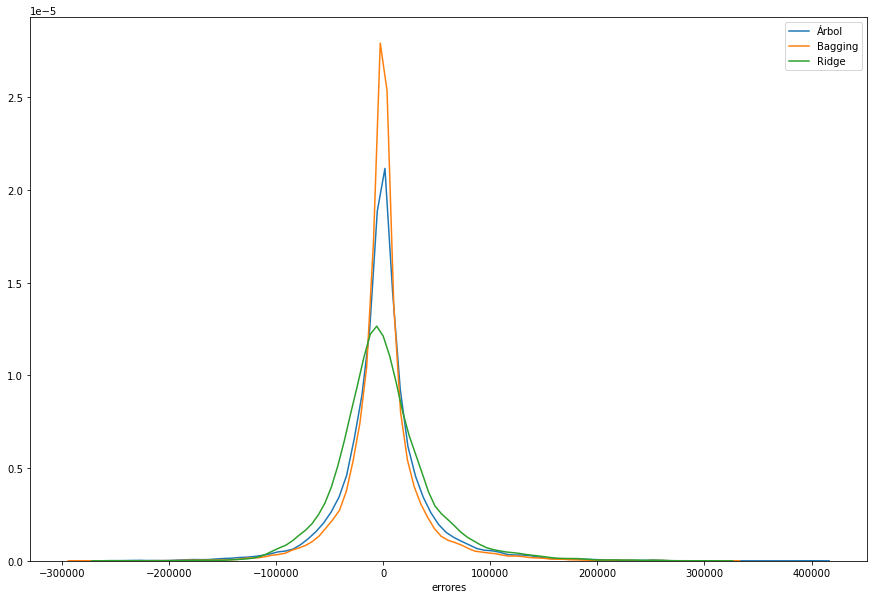

In [71]:
plt.figure(figsize = (15,10))
sns.distplot((y_test)-(y_test_pred_tree), bins = 50, label = 'Árbol',hist=False)
sns.distplot((y_test)-(y_test_pred_bag), bins = 50, label = 'Bagging',hist=False)
sns.distplot((y_test)-(y_test_pred_rid), bins = 50, label = 'Ridge',hist=False)
plt.xlabel('errores')
plt.legend()

#### Análisis de Errores

El siguiente cuadro sintetiza el desempeño de los modelos implementados:

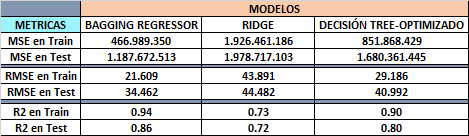

Cómo se puede observar, Bagging Regresor obtiene una mejor performance tanto en MSE, RMSE y R2.

Además de los modelos aquí presentados, he podido implementar Ada Boost Regressor y Random Forest Regressor. 

A continuación presento un cuadro general, en el cual incluyo los valores obtenidos por los últimos modelos mencionados y los alcanzados por el modelo elegido en el Primer Proyecto. 

De esta manera el lector, puede apreciar la clara mejoría en la performance de los modelos; sobre todo en comparación con lo evidenciado en el primer proyecto. 
				

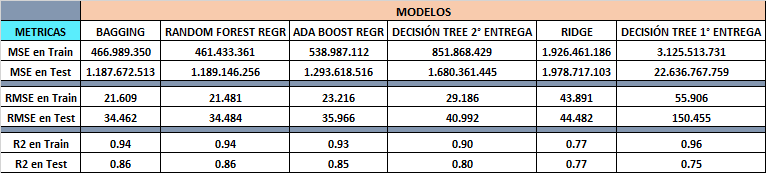

PARTE C.f - Metodología, Mejoras
PARA COMPLETAR: Está pendiente analizar la metodología utilizada, el checklist indica "Debes ser crítico/a con la metodología utilizada. ¿Qué mejorarías?"

A pesar de haber mejorado sustancialmente el desempeño de los modelos, lo cual es verificado por la reducción de errores; los modelos siguen teniendo baja capacidad predictiva si son evaluados en su capacidad de acertar en el precio de una propiedad, sobre todo en las de precios más elevados. 
Creo que esto ocurre por la dificultad que plantea una predicción sobre variables contínuas (precios)y que la metodología no logra "captar" las particularidades de por ejemplo propiedades con características específicas que elevan su precio; aún cuando cuenten con los mismos servicios; ambientes; calidad constructiva;etc . 
De esta manera, regreso a mi tesis del primer proyecto: se debe enriquecer el dataset con features que reflejen esos atributos, de otra manera, propiedades con alto valor "simbólico" (cultural,social;histórico;arquitectónico;etc) serán considerados probablemente cómo outliers (por su precio); cuando en realidad no lo son y la estimación del precio de la propiedad arrojará una desviación importante. 
Por ello, la ingeniería de features puede ser mejor desarrollada, esto dependerá de mi capacidad de adquirir más conocimientos sobre todo en programación, que es mi mayor debilidad. 
Asimismo, es de notar la falta de un desarrollo que permita incorporar valores de propiedades nuevas(no existentes en el dataset).
Recapítulando, la mejora en los indicadores de errores es sustancial; pero aún el mejor modelo obtenido (que ha sido optimizado con las metodologías aplicadas) en la práctica puede ser cuestionado por su capacidad predictiva respecto al valor de las propiedades en dinero; es decir el valor de mercado. Esta distorsión cuestiona el objeto del proyecto que es obtener un modelo que logre predicciones acertadas sobre el valor de las propiedades.